## Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
train=pd.read_csv('train.csv')

### Evolution by time of (Revenue vs Budget) 

Text(0, 0.5, 'Revenues/Budgets')

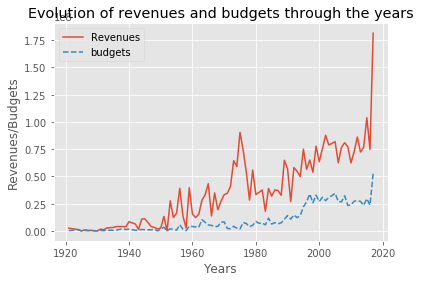

In [3]:
import datetime
def extract_year(d):
    dt=datetime.datetime.strptime(d,'%m/%d/%y')
    if dt.year>2019:
        return(dt.year-100)
    else:
        return(dt.year)

def extract_month(d):
    dt=datetime.datetime.strptime(d,'%m/%d/%y')
    return(dt.month)



df=train.loc[:,['id','genres','budget','release_date','revenue']]
df['year']=pd.DataFrame(map(extract_year,df['release_date']))
df['month']=pd.DataFrame(map(extract_month,df['release_date']))

A=df.loc[:,['year','revenue']]
B=df.loc[:,['year','budget']]

A_grouped=A.groupby('year').mean()
A_grouped.reset_index(inplace=True)
B_grouped=B.groupby('year').mean()
B_grouped.reset_index(inplace=True)

plt.style.use('ggplot')
years=A_grouped['year']
revenues=A_grouped['revenue']
budgets=B_grouped['budget']
plt.plot(years,revenues,label='Revenues')
plt.plot(years,budgets,linestyle='--',label='budgets')
plt.legend()
plt.title('Evolution of revenues and budgets through the years')
plt.xlabel('Years')
plt.ylabel('Revenues/Budgets')

## Evolution of number film genders by years

In [4]:
def name_genre(a):
    
    return([A['name'] for A in a])

def genres_count(genre,year):
    df=train.loc['id','year','genre']
    df.fillna('{}',inplace=True)
    A=list(map(str,df['genres']))
    C=list(map(eval,A))
    DD=list(map(name_genre,C))
    DD=pd.DataFrame(DD)
    DDD=pd.DataFrame(DD)
    A=pd.concat([B,DDD],axis=1)
    return A
    

In [5]:
train['year']=pd.DataFrame(map(extract_year,train['release_date']))
df=train.loc[:,['id','year','genres','revenue','budget','crew','cast','popularity']]
df.fillna('{}',inplace=True)
A=list(map(str,df['genres']))
C=list(map(eval,A))
DD=list(map(name_genre,C))
DD=pd.DataFrame(DD)
DDD=pd.DataFrame(DD)
A=pd.concat([df,DDD],axis=1)

In [6]:
A.rename(columns={0:'genre_0', 1:'genre_1',2:'genre_2',3:'genre_3',4:'genre_4',5:'genre_5',6:'genre_6'},inplace=True)

Text(0, 0.5, 'count')

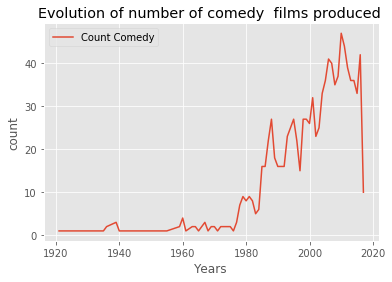

In [7]:
def Number_Genre_Evolution(genre):
    A_1=A.loc[:,['id','year','genre_0']]
    S=A_1.groupby(['year','genre_0']).count()
    S.reset_index(inplace=True)
    S=S[S['genre_0']==genre]
    S.rename(columns={'id':'Sum'},inplace=True)
    for i in ['genre_1','genre_2','genre_3','genre_4','genre_5','genre_6']:
        A_2=A.loc[:,['id','year',i]]
        SS=A_2.groupby(['year',i]).count()
        SS.reset_index(inplace=True)
        B_=SS[SS[i]==genre]
        BB_=B_.loc[:,['year','id']]
        CC=S.merge(BB_,left_on='year',right_on='year',how='outer')
        CC.fillna(0,inplace=True)
        CC['Sum']=CC['Sum']+CC['id']
        S=CC.loc[:,['year','Sum']]
        S.sort_values(by='year',inplace=True)
    return S
df_1=Number_Genre_Evolution('Comedy')
plt.style.use('ggplot')
years=df_1['year']
count_comedy=df_1['Sum']
plt.plot(years,count_comedy,label='Count Comedy')
plt.legend()
plt.title('Evolution of number of comedy  films produced ')
plt.xlabel('Years')
plt.ylabel('count')

Text(0, 0.5, 'count')

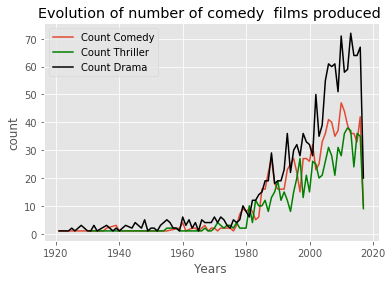

In [8]:
df_1=Number_Genre_Evolution('Drama')
df_2=Number_Genre_Evolution('Thriller')
plt.style.use('ggplot')
years=df_1['year']
count_drama=df_1['Sum']
years_=df_2['year']
count_thriller=df_2['Sum']
df_3=Number_Genre_Evolution('Comedy')
plt.style.use('ggplot')
years__=df_3['year']
count_comedy=df_3['Sum']
plt.plot(years__,count_comedy,label='Count Comedy')
plt.plot(years_,count_thriller,color='green',label='Count Thriller')
plt.plot(years,count_drama,color='black',label='Count Drama')



plt.legend()
plt.title('Evolution of number of comedy  films produced ')
plt.xlabel('Years')
plt.ylabel('count')

Text(0, 0.5, 'count')

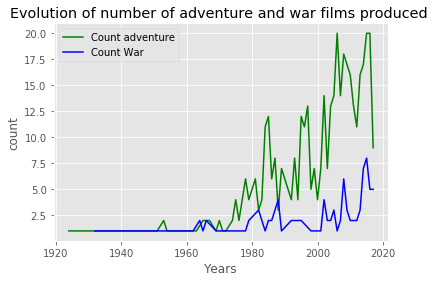

In [9]:
df_1=Number_Genre_Evolution('Adventure')
plt.style.use('ggplot')
years=df_1['year']
count_adventure=df_1['Sum']
plt.plot(years,count_adventure,color='green',label='Count adventure')


df_2=Number_Genre_Evolution('War')
plt.style.use('ggplot')
years_=df_2['year']
count_War=df_2['Sum']
plt.plot(years_,count_War,color='blue',label='Count War')

plt.legend()
plt.title('Evolution of number of adventure and war films produced ')
plt.xlabel('Years')
plt.ylabel('count')

### Comparison between the evolution of the revenue and budget by film gender

In [10]:
def Revenue_Evolution(genre):
    A_1=A.loc[:,['year','genre_0','revenue']]
    S=A_1.groupby(['year','genre_0']).mean()
    S.reset_index(inplace=True)
    S=S[S['genre_0']==genre]
    S.rename(columns={'revenue':'Sum'},inplace=True)
    for i in ['genre_1','genre_2','genre_3','genre_4','genre_5','genre_6']:
        A_2=A.loc[:,['year',i,'revenue']]
        SS=A_2.groupby(['year',i]).mean()
        SS.reset_index(inplace=True)
        B_=SS[SS[i]==genre]
        BB_=B_.loc[:,['year','revenue']]
        CC=S.merge(BB_,left_on='year',right_on='year',how='outer')
        CC.fillna(0,inplace=True)
        CC['Sum']=CC['Sum']+CC['revenue']
        S=CC.loc[:,['year','Sum']]
        S.sort_values(by='year',inplace=True)
    return S



def Budget_Evolution(genre):
    A_1=A.loc[:,['year','genre_0','budget']]
    S=A_1.groupby(['year','genre_0']).mean()
    S.reset_index(inplace=True)
    S=S[S['genre_0']==genre]
    S.rename(columns={'budget':'Sum'},inplace=True)
    for i in ['genre_1','genre_2','genre_3','genre_4','genre_5','genre_6']:
        A_2=A.loc[:,['year',i,'budget']]
        SS=A_2.groupby(['year',i]).mean()
        SS.reset_index(inplace=True)
        B_=SS[SS[i]==genre]
        BB_=B_.loc[:,['year','budget']]
        CC=S.merge(BB_,left_on='year',right_on='year',how='outer')
        CC.fillna(0,inplace=True)
        CC['Sum']=CC['Sum']+CC['budget']
        S=CC.loc[:,['year','Sum']]
        S.sort_values(by='year',inplace=True)
    return S


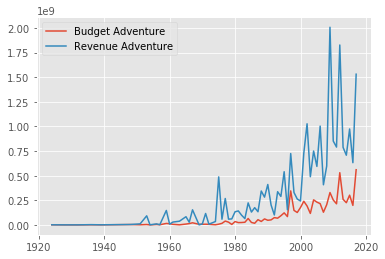

In [11]:
plt.style.use('ggplot')
df_1=Budget_Evolution('Adventure')
df_2=Revenue_Evolution('Adventure')
years=df_1['year']
years_=df_2['year']
Count_Drama=df_1['Sum']
Count_Comedy=df_2['Sum']
plt.plot(years,Count_Drama,label='Budget Adventure')
plt.plot(years_,Count_Comedy,label='Revenue Adventure')
plt.legend()

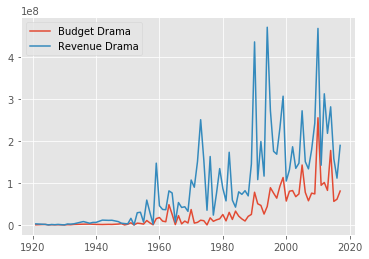

In [12]:
plt.style.use('ggplot')
df_1=Budget_Evolution('Drama')
df_2=Revenue_Evolution('Drama')
years=df_1['year']
years_=df_2['year']
Count_Drama=df_1['Sum']
Count_Comedy=df_2['Sum']
plt.plot(years,Count_Drama,label='Budget Drama')
plt.plot(years_,Count_Comedy,label='Revenue Drama')
plt.legend()

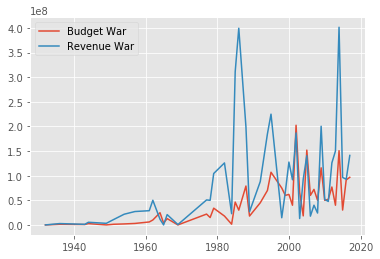

In [13]:
plt.style.use('ggplot')
df_1=Budget_Evolution('War')
df_2=Revenue_Evolution('War')
years=df_1['year']
years_=df_2['year']
Count_Drama=df_1['Sum']
Count_Comedy=df_2['Sum']
plt.plot(years,Count_Drama,label='Budget War')
plt.plot(years_,Count_Comedy,label='Revenue War')
plt.legend()

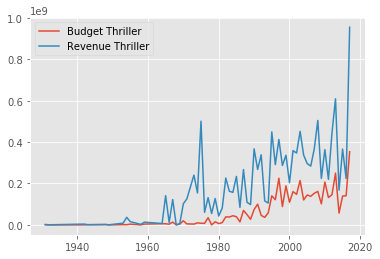

In [14]:
plt.style.use('ggplot')
df_1=Budget_Evolution('Thriller')
df_2=Revenue_Evolution('Thriller')
years=df_1['year']
years_=df_2['year']
Count_Drama=df_1['Sum']
Count_Comedy=df_2['Sum']
plt.plot(years,Count_Drama,label='Budget Thriller')
plt.plot(years_,Count_Comedy,label='Revenue Thriller')
plt.legend()

## Count of films by gender (considering that the film can have many genders)

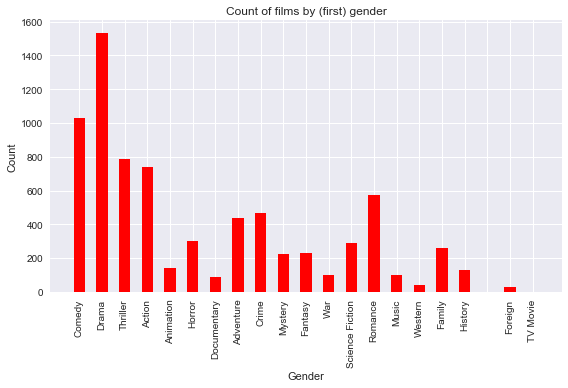

In [15]:
df_3=pd.DataFrame(A['genre_0'].unique())
df.fillna('{}',inplace=True)
AA=list(map(str,df['genres']))
C=list(map(eval,AA))
DD=list(map(name_genre,C))
DD
def  count(a):
    def is_in(A):
        if a in A:
            return 1
        else:
            return 0
    
    return(sum(list(map(is_in,DD))))
    

df_3['count']=list(map(count,A['genre_0'].unique()))
plt.style.use("seaborn")
genres=df_3[0]
x_indexes=np.arange(len(genres))
count=df_3['count']
width=0.5
plt.bar(x_indexes,count,width=width,color='red')

plt.xticks(ticks=x_indexes,labels=genres,rotation=90)
plt.title("Count of films by (first) gender")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()

## Feature Engineering

### Coding the different gender of the film by creating other feature 

In [16]:
def id_genre(a):
    
    return([A['id'] for A in a])




df=train.loc[:,['id','year','genres','revenue','budget']]
df.fillna('{}',inplace=True)
A=list(map(str,df['genres']))
C=list(map(eval,A))
DD=list(map(id_genre,C))
DD=pd.DataFrame(DD)
DDD=pd.DataFrame(DD)
A=pd.concat([df,DDD],axis=1)
A.rename(columns={0:'genre_0', 1:'genre_1',2:'genre_2',3:'genre_3',4:'genre_4',5:'genre_5',6:'genre_6'},inplace=True)
A.fillna(-1,inplace=True)

### Number of crew,cast,production companies,production countries

In [17]:
for i in ['genres','cast','crew','production_companies','production_countries','spoken_languages']:
    df_=train[i]
    df_.fillna('{}',inplace=True)
    A_=list(map(str,df_))
    C=list(map(eval,A_))
    A['Nombre_'+i]=list(map(len,C))

### Encoding the categorical variable original language

In [18]:
from sklearn.preprocessing import LabelEncoder
x=LabelEncoder().fit_transform(np.array(train.loc[:,'original_language']))
A['original_language_processed']=pd.DataFrame(x)

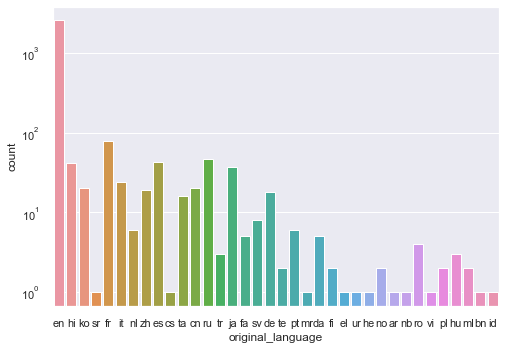

In [19]:
import seaborn as sns
df=train.loc[:,['id','original_language']]

sns.set(style="darkgrid")
ax = sns.countplot(x="original_language", data=df,log=True)

### Dealing with missing values

In [20]:
df=train.loc[:,'runtime']
df.fillna(np.mean(df),inplace=True)
A['runtime']=pd.DataFrame(df)
A['popularity']=train['popularity']
A.columns

Index(['id', 'year', 'genres', 'revenue', 'budget', 'genre_0', 'genre_1',
       'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'Nombre_genres',
       'Nombre_cast', 'Nombre_crew', 'Nombre_production_companies',
       'Nombre_production_countries', 'Nombre_spoken_languages',
       'original_language_processed', 'runtime', 'popularity'],
      dtype='object')

## Building Machine learning pipeline 

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


X=A.loc[:,['budget','year','genre_0',  'Nombre_genres',
       'Nombre_cast', 'Nombre_crew', 'popularity', 'Nombre_production_countries',
       'Nombre_spoken_languages', 'Nombre_production_companies','runtime',
       'Nombre_production_countries', 'original_language_processed']]

y=A.loc[:,'revenue']

In [22]:
X.shape

(3000, 13)

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import KernelPCA 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 
pipe=Pipeline(steps=[('pca',KernelPCA()),('DTR',RandomForestRegressor())])
param_grid={'pca__kernel':['linear','rbf'],
    'pca__n_components':[4,5,6,7,8,9],
    'DTR__n_estimators':np.arange(30,81,10),
    'DTR__max_depth':np.arange(3,9),
    
}


X_train,X_test,y_train,y_test=train_test_split(X,y)


model=GridSearchCV(pipe,param_grid,n_jobs=-1,cv=3, scoring='neg_mean_squared_log_error')
model.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        KernelPCA(alpha=1.0, coef0=1,
                                                  copy_X=True, degree=3,
                                                  eigen_solver='auto',
                                                  fit_inverse_transform=False,
                                                  gamma=None, kernel='linear',
                                                  kernel_params=None,
                                                  max_iter=None,
                                                  n_components=None,
                                                  n_jobs=None,
                                                  random_state=None,
                                                  remove_zero_eig=False,
                                                  tol=0)),
                

In [31]:
print(model.best_params_)
print(model.best_score_)

{'DTR__max_depth': 8, 'DTR__n_estimators': 70, 'pca__kernel': 'linear', 'pca__n_components': 7}
-7.912142054339628


In [32]:
np.sqrt(np.abs(model.best_score_))

2.8128530097286686

In [33]:
from sklearn.svm import SVR
from sklearn.decomposition import PCA,KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import NeighborhoodComponentsAnalysis
pipe=Pipeline(steps=[('Scaler',MinMaxScaler()),('reduc',KernelPCA(kernel='rbf')),('SVR',SVR())])
param_grid={'Scaler':(MinMaxScaler(),),
    'reduc__kernel':['linear','rbf'],
    'reduc__n_components':[3,4,5,6,7],
    'SVR__C':[0.001,0.01,0.1,1,10,100],
    'SVR__gamma':[0.01,0.1,1]
},
{'Scaler':(StandardScaler(),),
    'reduc__kernel':['linear','rbf'],
    'reduc__n_components':[3,4,5,6,7],
    'SVR__C':[0.001,0.01,0.1,1,10,100],
    'SVR__gamma':[0.01,0.1,1]
}




X_train,X_test,y_train,y_test=train_test_split(X,y)


model=GridSearchCV(pipe,param_grid,n_jobs=-1,cv=3,scoring='neg_mean_squared_log_error')
model.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('Scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('reduc',
                                        KernelPCA(alpha=1.0, coef0=1,
                                                  copy_X=True, degree=3,
                                                  eigen_solver='auto',
                                                  fit_inverse_transform=False,
                                                  gamma=None, kernel='rbf',
                                                  kernel_params=None,
                                                  max_iter=None,
                                                  n_components=None,
                                                  n_jobs=None,
                           

In [34]:
print(model.best_params_)
print(model.best_score_)

{'SVR__C': 100, 'SVR__gamma': 1, 'Scaler': MinMaxScaler(copy=True, feature_range=(0, 1)), 'reduc__kernel': 'linear', 'reduc__n_components': 3}
-9.71523023839789


## ML pipeline using RandomForestRegressor

In [35]:
from sklearn.metrics import mean_squared_log_error
pipe_1=Pipeline(steps=[('pca',KernelPCA(kernel='linear',n_components=7)),('DTR',RandomForestRegressor(n_estimators=70,max_depth=8))])

pipe_1.fit(X_train,y_train)
y_predict_train=pipe_1.predict(X_train)
y_predict_test=pipe_1.predict(X_test)

print('Train error :',np.sqrt(mean_squared_log_error(y_predict_train,y_train)))
print('Test error :',np.sqrt(mean_squared_log_error(y_predict_test,y_test)))

Train error : 2.6724546701079555
Test error : 2.7810032896662964


## ML pipeline using SVR

In [36]:
pipe_2=Pipeline(steps=[('Scaler',MinMaxScaler()),('reduc',KernelPCA(kernel='linear',n_components=3)),('SVR',SVR(C=100,gamma=1))])

pipe_2.fit(X_train,y_train)
y_predict_train=pipe_2.predict(X_train)
y_predict_test=pipe_2.predict(X_test)

print('Train error :',np.sqrt(mean_squared_log_error(y_predict_train,y_train)))
print('Test error :',np.sqrt(mean_squared_log_error(y_predict_test,y_test)))

Train error : 3.1159937120243177
Test error : 3.19764097403279
